# 911 Calls Dataset

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df=pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [11]:
df.zip.value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [12]:
df.twp.value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [13]:
df.title.nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

In [14]:
df['Reason']=df.title.apply(lambda x: x.split(':')[0] )

** What is the most common Reason for a 911 call based off of this new column? **

In [15]:
df.Reason.value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

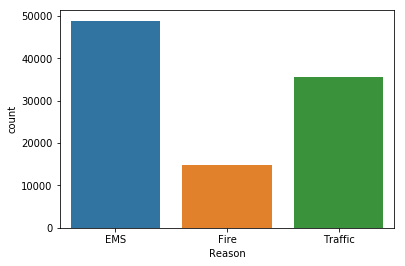

In [16]:
sns.countplot(df.Reason)

In [19]:
df.timeStamp=pd.to_datetime(df.timeStamp)

In [37]:
df['Month']=df.timeStamp.dt.month
df['Hour']=df.timeStamp.dt.hour
df['DayofWeek']=df.timeStamp.dt.dayofweek
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['DayofWeek']=df['DayofWeek'].map(dmap)

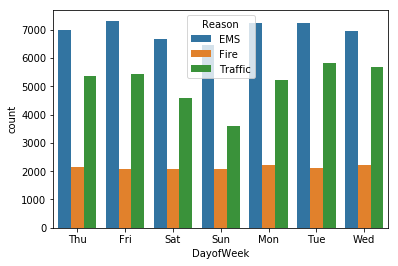

In [38]:
sns.countplot(df.DayofWeek, hue=df.Reason)

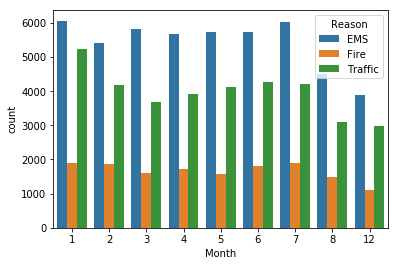

In [39]:
sns.countplot(df.Month, hue=df.Reason)

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [53]:
mcount=df.groupby('Month').count()

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

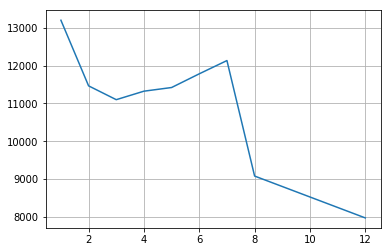

In [47]:
fig, ax = plt.subplots()
ax.plot(mcount.index, mcount.lat)
ax.grid()

Linear Regression Plot

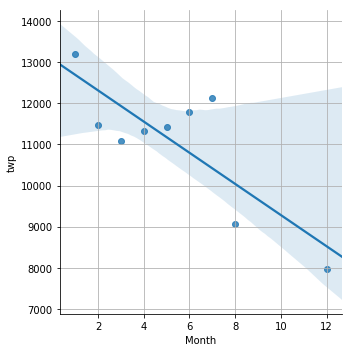

In [122]:
mcount.reset_index(inplace=True)
sns.lmplot(x='Month', y='twp', data=mcount)
plt.grid()

**Create a new column called 'Date' that contains the date from the timeStamp column. 

In [91]:
df['Date']=df.timeStamp.apply(lambda x: x.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

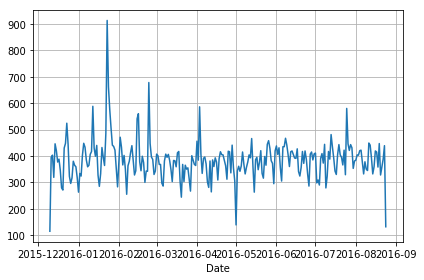

In [95]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.grid()

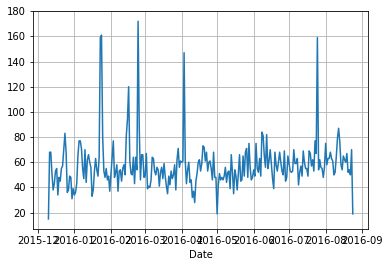

In [121]:
df[df.Reason=='Fire'].groupby('Date').count()['twp'].plot()
plt.grid()

In [118]:
heat=df.groupby(['DayofWeek', 'Hour']).twp.count().unstack()

** Now create a heatmap using this DataFrame. **

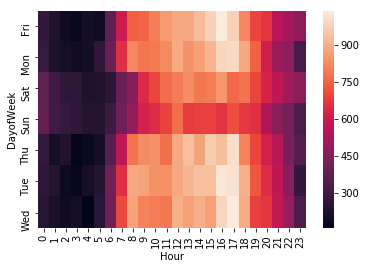

In [114]:
sns.heatmap(data=heat)

** Now create a clustermap using this DataFrame. **

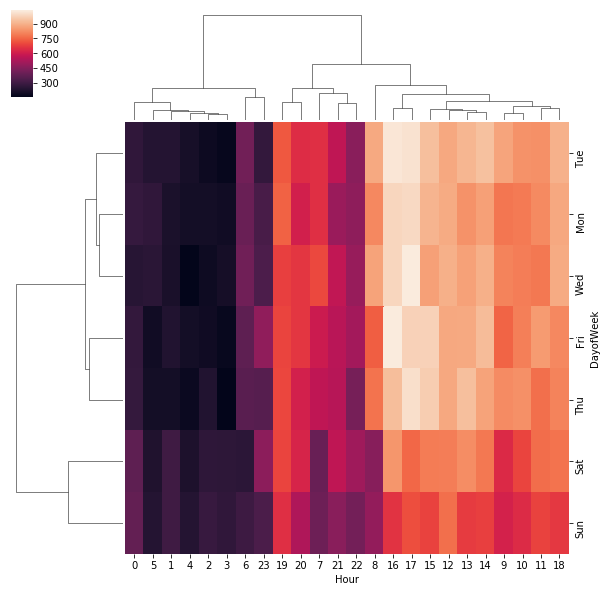

In [115]:
sns.clustermap(data=heat)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [117]:
heatmonth=df.groupby(['DayofWeek', 'Month']).twp.count().unstack()

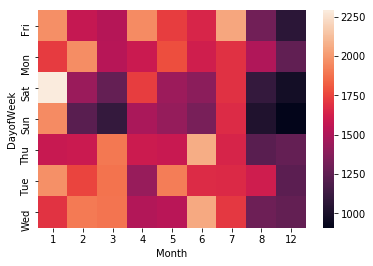

In [119]:
sns.heatmap(heatmonth)

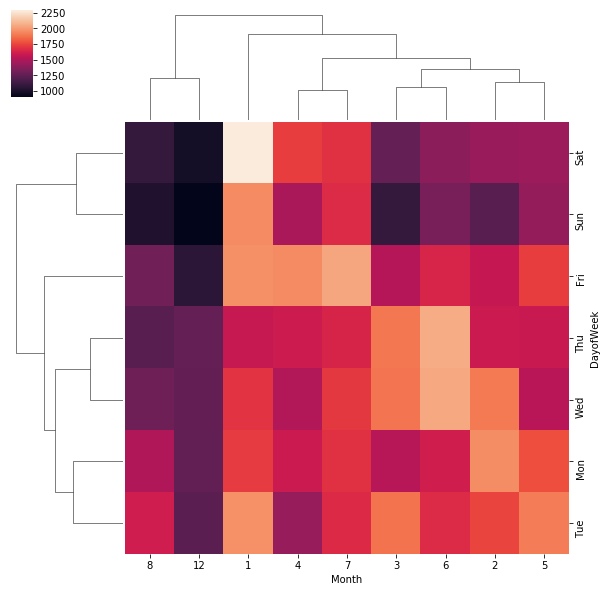

In [120]:
sns.clustermap(heatmonth)